<a href="https://colab.research.google.com/github/Pavithratrdev/PlacementKITE/blob/master/AlphabetRecognitionFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Alphabet Recognition System using Convolutional Neural Network (CNN)

Convolutional Neural Network (CNN) is a Deep Learning Algorithm widely used for character recognition. This algorithm identifies the alphabet from the given input image.

The accuracy achieved using this algorithm is 93.42%.

## 1. Anvil Integration

In [3]:
pip install anvil-uplink

     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 51 kB 187 kB/s 
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45230 sha256=650bb3135d76a8c7cf23c2ecabf76609a6491eb48730de5518768d2bd60eca8e
  Stored in directory: /root/.cache/pip/wheels/29/ea/7d/3410aa0aa0e4402ead9a7a97ab2214804887e0f5c2b76f0c96
Successfully built ws4py


In [4]:
import anvil.server
import anvil.media
anvil.server.connect("44STZQZQTYAAVHHWGRPMXDRN-P5VUQGPD3HW5UMWJ")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


## 2. Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
import os
import pickle


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 3. Defining the Model Architecture

In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (32,32,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
l2 = Dense(units = 128, activation = 'relu')
model.add(l2)
model.add(Dense(units = 26, activation = 'softmax'))


# one hot encoding (a,b,c) => [1,0,0], [0,1,0], [0,0,1]
# integer encoding (a,b,c) => 1,2,3 => sparse_categorical_crossentropy

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               147584    
_________________________________________________________________
dense_3 (Dense)              (None, 26)               

In [ ]:
l2.get_weights()

## 4. Importing the Dataset

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    directory = '/content/drive/MyDrive/Training Alphabets',
    target_size = (32,32),
    batch_size = 32,
    class_mode = 'categorical'

)

test_generator = test_datagen.flow_from_directory(
    directory = '/content/drive/MyDrive/Training Alphabets',
    target_size = (32,32),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 501 images belonging to 26 classes.
Found 501 images belonging to 26 classes.


## 5. Training the Model

In [8]:
history = model.fit_generator(train_generator,
                         steps_per_epoch = 16,
                         epochs = 3,
                         validation_data = test_generator,
                         validation_steps = 16)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
16/16 [==============================] - 137s 7s/step - loss: 3.1764 - accuracy: 0.1238 - val_loss: 2.8734 - val_accuracy: 0.5030
Epoch 2/3
16/16 [==============================] - 2s 136ms/step - loss: 2.4257 - accuracy: 0.4850 - val_loss: 1.4769 - val_accuracy: 0.6188
Epoch 3/3
16/16 [==============================] - 2s 136ms/step - loss: 1.2494 - accuracy: 0.6248 - val_loss: 0.8147 - val_accuracy: 0.7385


## 6. Saving/Loading the Model

In [9]:
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [11]:
import tensorflow as tf

In [12]:
new_model = tf.keras.models.load_model('saved_model/my_model')

In [13]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               147584    
_________________________________________________________________
dense_3 (Dense)              (None, 26)               

## 7. Testing the Model

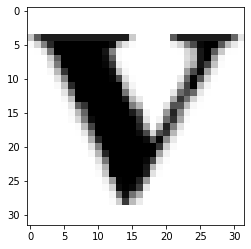

In [21]:
filename = r'/content/drive/MyDrive/Training Alphabets/v/10.png'
test_image = image.load_img(filename, target_size = (32,32))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)


In [30]:
ops = os.listdir('/content/drive/MyDrive/Training Alphabets')
ops.sort()
ops = np.array(ops)

In [31]:
result = model.predict(test_image)
ops[np.argmax(result)]

'y'

In [35]:
labels = test_generator.classes

In [46]:
y_pred = model.predict(test_generator)
predictions = list(map(np.argmax, y_pred))

In [47]:
res = tf.math.confusion_matrix(labels,predictions)

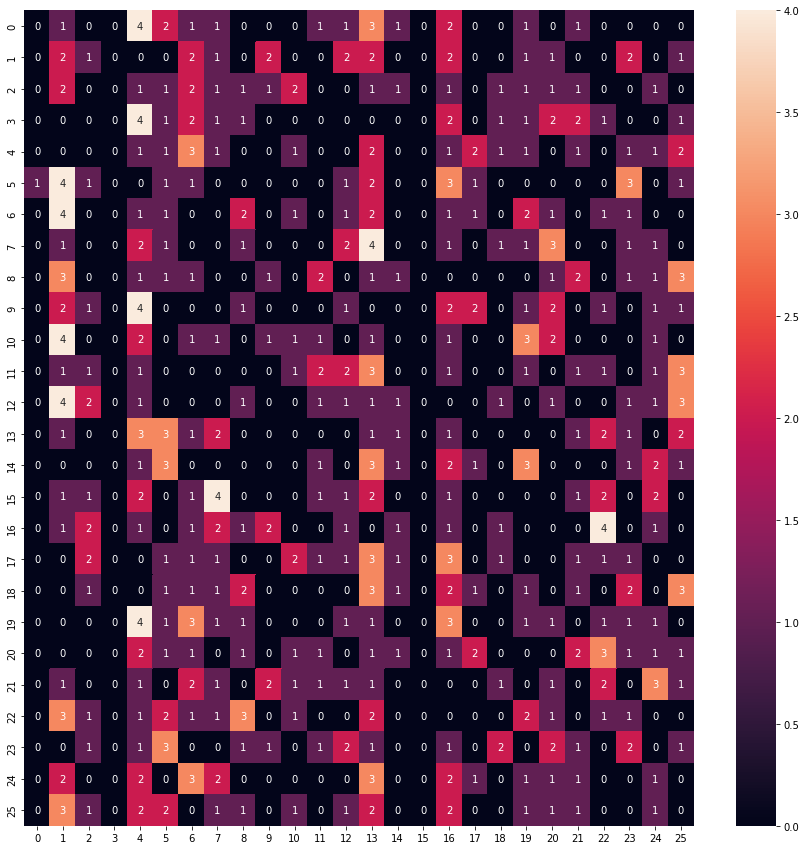

In [50]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(15,15))

sns.heatmap(res, annot=True)

## 8. Predicting the Alphabet from the Input Image

This part of code is receives the input image from the anvil website and returns the predicted alphabet back to the website.

In [ ]:
@anvil.server.callable
def model_run(path):
    with anvil.media.TempFile(path) as filename:
        test_image = image.load_img(filename, target_size = (32,32))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = 0)
        result = model.predict(test_image)
        result = get_result(result)
        return ('Predicted Alphabet is: {}'.format(result))
        